In [89]:
import pandas as pd
import numpy as np

from pathlib import Path
import seaborn as sns
from tqdm import tqdm

import matplotlib.pyplot as plt

from Historic_Crypto import HistoricalData
from Historic_Crypto import Cryptocurrencies


import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import os


import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 50)

In [69]:
fig_path = Path("../../Plot")
fig_path

WindowsPath('../../Plot')

### All Cryptocurrencies information

In [36]:
df_cryptopairs = Cryptocurrencies().find_crypto_pairs()
df_cryptopairs = df_cryptopairs.query("status == 'online' and fx_stablecoin == False")
df_cryptopairs

Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.


,id,display_name,fx_stablecoin,max_slippage_percentage,status
0,IOTX-EUR,IOTX/EUR,False,0.03000000,online
1,ETH-GBP,ETH/GBP,False,0.03000000,online
2,JASMY-USD,JASMY/USD,False,0.03000000,online
3,DDX-USD,DDX/USD,False,0.03000000,online
4,AIOZ-USD,AIOZ/USD,False,0.03000000,online
...,...,...,...,...,...
558,RGT-USD,RGT/USD,False,0.03000000,online
559,TIME-USDT,TIME/USDT,False,0.03000000,online
560,ORN-BTC,ORN/BTC,False,0.03000000,online
561,DIA-EUR,DIA/EUR,False,0.03000000,online


In [37]:
list(df_cryptopairs.sort_values("id")['display_name'].values)

['00/USD',
 '1INCH/BTC',
 '1INCH/EUR',
 '1INCH/GBP',
 '1INCH/USD',
 'AAVE/BTC',
 'AAVE/EUR',
 'AAVE/GBP',
 'AAVE/USD',
 'ABT/USD',
 'ACH/USD',
 'ACH/USDT',
 'ADA/BTC',
 'ADA/ETH',
 'ADA/EUR',
 'ADA/GBP',
 'ADA/USD',
 'ADA/USDT',
 'AERGO/USD',
 'AGLD/USD',
 'AGLD/USDT',
 'AIOZ/USD',
 'AIOZ/USDT',
 'ALCX/EUR',
 'ALCX/USD',
 'ALCX/USDT',
 'ALEPH/USD',
 'ALGO/BTC',
 'ALGO/EUR',
 'ALGO/GBP',
 'ALGO/USD',
 'ALICE/USD',
 'AMP/USD',
 'ANKR/BTC',
 'ANKR/EUR',
 'ANKR/GBP',
 'ANKR/USD',
 'APE/EUR',
 'APE/USD',
 'APE/USDT',
 'API3/USD',
 'API3/USDT',
 'APT/USD',
 'ARPA/EUR',
 'ARPA/USD',
 'ARPA/USDT',
 'ASM/USD',
 'ASM/USDT',
 'AST/USD',
 'ATA/USD',
 'ATA/USDT',
 'ATOM/BTC',
 'ATOM/EUR',
 'ATOM/GBP',
 'ATOM/USD',
 'ATOM/USDT',
 'AUCTION/EUR',
 'AUCTION/USD',
 'AUCTION/USDT',
 'AURORA/USD',
 'AVAX/BTC',
 'AVAX/EUR',
 'AVAX/USD',
 'AVAX/USDT',
 'AVT/USD',
 'AXS/BTC',
 'AXS/EUR',
 'AXS/USD',
 'AXS/USDT',
 'BADGER/EUR',
 'BADGER/USD',
 'BADGER/USDT',
 'BAL/BTC',
 'BAL/USD',
 'BAND/BTC',
 'BAND/EUR',
 

### Top K Market Value

In [38]:
start_data = '2022-01-01-00-00'
end_date = '2022-06-30-00-00'

frequency = 60 * 60 * 24

idToMkt = {}

for id in df_cryptopairs['id']:
    try:
        data = HistoricalData(id, frequency, start_data, end_date).retrieve_data()
    except:
        continue
    avgVolume = data['volume'].mean()
    avgPrice = data['close'].mean()
    idToMkt[id] = avgVolume * avgPrice

df_idToMkt = pd.DataFrame(idToMkt, index = ['mkt']).T.sort_values(by='mkt', ascending=False)

df_idToMkt.head(10)

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'IOTX-EUR' found at the CoinBase Pro API, continuing to extraction.
Retrieved Data from Coinbase Pro API.
Returning data.
Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'ETH-GBP' found at the CoinBase Pro API, continuing to extraction.
Retrieved Data from Coinbase Pro API.
Returning data.
Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'JASMY-USD' found at the CoinBase Pro API, continuing to extraction.
Retrieved Data from Coinbase Pro API.
Returning data.
Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is ava

,mkt
BTC-USD,7.015202e+08
ETH-USD,5.422595e+08
SOL-USD,1.536598e+08
AVAX-USD,9.233364e+07
ADA-USD,9.079091e+07
SHIB-USD,8.376272e+07
APE-USD,5.677718e+07
MATIC-USD,5.542391e+07
LINK-USD,4.869366e+07
BTC-EUR,4.833958e+07


In [39]:
df_idToMkt.head(20)

,mkt
BTC-USD,7.015202e+08
ETH-USD,5.422595e+08
SOL-USD,1.536598e+08
AVAX-USD,9.233364e+07
ADA-USD,9.079091e+07
SHIB-USD,8.376272e+07
APE-USD,5.677718e+07
MATIC-USD,5.542391e+07
LINK-USD,4.869366e+07
BTC-EUR,4.833958e+07


In [44]:
# select_cryptopairs = df_idToMkt.index[4: 9]
# select_cryptopairs = select_cryptopairs.drop('USDT-USD')
select_cryptopairs = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'AVAX-USD', 'ADA-USD', 'APE-USD', 'MATIC-USD', 'LINK-USD', 'ATOM-USD', 'DOGE-USD', 'JASMY-USD', 'GALA-USD'] #['MANA-USD', 'LTC-USD', 'DOT-USD', 'ALGO-USD']
select_cryptopairs

['BTC-USD',
 'ETH-USD',
 'SOL-USD',
 'AVAX-USD',
 'ADA-USD',
 'APE-USD',
 'MATIC-USD',
 'LINK-USD',
 'ATOM-USD',
 'DOGE-USD',
 'JASMY-USD',
 'GALA-USD']

### Construct DataBase

In [45]:
db_path = Path("./crypto.h5")
db_path

WindowsPath('crypto.h5')

In [46]:
start_data = '2020-01-01-00-00'
# start_data = '2022-06-01-00-00'
end_date = '2022-06-30-00-00'

# 3600 : 1h
frequency = 60 * 60

df_all = pd.DataFrame()

for id in select_cryptopairs:
    df = pd.DataFrame()
    try:
        df = HistoricalData(id, frequency, start_data, end_date).retrieve_data().reset_index()
    except:
        continue

    df['id'] = id
    df = df.set_index(['time', 'id'])

    df_all = pd.concat([df_all, df], axis=0, )



Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-01-01T00:00:00
Provisional End: 2020-01-13T12:00:00
Data for chunk 1 of 73 extracted
Provisional Start: 2020-01-13T12:00:00
Provisional End: 2020-01-26T00:00:00
Data for chunk 2 of 73 extracted
Provisional Start: 2020-01-26T00:00:00
Provisional End: 2020-02-07T12:00:00
Data for chunk 3 of 73 extracted
Provisional Start: 2020-02-07T12:00:00
Provisional End: 2020-02-20T00:00:00
Data for chunk 4 of 73 extracted
Provisional Start: 2020-02-20T00:00:00
Provisional End: 2020-03-03T12:00:00
Data for chunk 5 of 73 extracted
Provisional Start: 2020-03-03T12:00:00
Provisional End: 2020-03-16T00:00:00
Data for chunk 6 of 73 extracted
Provisional Start: 2020-03-16T00:00:00
Provisional End: 2020-03-28T12:00:00
Data for chunk 7 of 73 ext

In [47]:
for crypto in select_cryptopairs:
    
    temp = df_all.swaplevel().sort_index().loc[crypto, :]
    print(crypto, temp.index[0], temp.index[-1])

BTC-USD 2020-01-01 01:00:00 2022-06-30 00:00:00
ETH-USD 2020-01-01 01:00:00 2022-06-30 00:00:00
SOL-USD 2021-06-17 16:00:00 2022-06-30 00:00:00
AVAX-USD 2021-09-30 19:00:00 2022-06-30 00:00:00
ADA-USD 2021-03-18 16:00:00 2022-06-30 00:00:00
APE-USD 2022-03-17 16:00:00 2022-06-30 00:00:00
MATIC-USD 2021-03-11 17:00:00 2022-06-30 00:00:00
LINK-USD 2020-01-01 01:00:00 2022-06-30 00:00:00
ATOM-USD 2020-01-14 18:00:00 2022-06-30 00:00:00
DOGE-USD 2021-06-03 16:00:00 2022-06-30 00:00:00
JASMY-USD 2021-10-07 19:00:00 2022-06-30 00:00:00
GALA-USD 2021-11-16 17:00:00 2022-06-30 00:00:00


In [48]:
with pd.HDFStore(db_path) as store:
    store.put(f"Min{int(frequency/60)}", df_all)

db_path.stat().st_size

6695353

### EDA

In [49]:
frequency = 60 * 60
df_all = pd.read_hdf(db_path, f"Min{int(frequency/60)}")

df_ts = df_all['close'].unstack()
df_ts.columns

Index(['ADA-USD', 'APE-USD', 'ATOM-USD', 'AVAX-USD', 'BTC-USD', 'DOGE-USD',
       'ETH-USD', 'GALA-USD', 'JASMY-USD', 'LINK-USD', 'MATIC-USD', 'SOL-USD'],
      dtype='object', name='id')

In [50]:
df_ts

id,ADA-USD,APE-USD,ATOM-USD,AVAX-USD,BTC-USD,DOGE-USD,ETH-USD,GALA-USD,JASMY-USD,LINK-USD,MATIC-USD,SOL-USD
time,,,,,,,,,,,,
2020-01-01 01:00:00,NaN,NaN,NaN,NaN,7194.52,NaN,130.14,NaN,NaN,1.77679,NaN,NaN
2020-01-01 02:00:00,NaN,NaN,NaN,NaN,7217.00,NaN,130.37,NaN,NaN,1.79667,NaN,NaN
2020-01-01 03:00:00,NaN,NaN,NaN,NaN,7196.98,NaN,129.57,NaN,NaN,1.79041,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,7186.41,NaN,129.56,NaN,NaN,1.78986,NaN,NaN
2020-01-01 05:00:00,NaN,NaN,NaN,NaN,7197.31,NaN,129.83,NaN,NaN,1.79998,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-29 20:00:00,0.4694,4.798,7.379,17.91,20196.84,0.07048,1108.00,0.05734,0.00926,6.32300,0.5038,34.27
2022-06-29 21:00:00,0.4686,4.743,7.374,17.79,20275.33,0.07017,1112.55,0.05711,0.00934,6.31700,0.5003,34.16
2022-06-29 22:00:00,0.4688,4.770,7.421,17.87,20191.67,0.07025,1107.79,0.05729,0.00925,6.26900,0.5009,34.11


In [51]:
df_ts_ret = df_ts.copy()

df_ts_ret = df_ts_ret.pct_change().dropna()
df_ts_ret.corr()

id,ADA-USD,APE-USD,ATOM-USD,AVAX-USD,BTC-USD,DOGE-USD,ETH-USD,GALA-USD,JASMY-USD,LINK-USD,MATIC-USD,SOL-USD
id,,,,,,,,,,,,
ADA-USD,1.000000,0.565809,0.769968,0.790685,0.773060,0.720337,0.791317,0.778520,0.506220,0.811442,0.810899,0.803809
APE-USD,0.565809,1.000000,0.589278,0.605351,0.589546,0.533539,0.594290,0.592617,0.374973,0.603677,0.596803,0.591874
ATOM-USD,0.769968,0.589278,1.000000,0.826502,0.754803,0.724263,0.770119,0.791689,0.490639,0.803506,0.807778,0.794176
AVAX-USD,0.790685,0.605351,0.826502,1.000000,0.787406,0.728308,0.803466,0.804757,0.518900,0.825965,0.838613,0.856402
BTC-USD,0.773060,0.589546,0.754803,0.787406,1.000000,0.741372,0.912635,0.743614,0.518594,0.819323,0.807293,0.811468
DOGE-USD,0.720337,0.533539,0.724263,0.728308,0.741372,1.000000,0.761386,0.707168,0.453350,0.754778,0.752136,0.733460
ETH-USD,0.791317,0.594290,0.770119,0.803466,0.912635,0.761386,1.000000,0.754596,0.517615,0.856661,0.834392,0.835207
GALA-USD,0.778520,0.592617,0.791689,0.804757,0.743614,0.707168,0.754596,1.000000,0.527689,0.798912,0.820004,0.799153
JASMY-USD,0.506220,0.374973,0.490639,0.518900,0.518594,0.453350,0.517615,0.527689,1.000000,0.529975,0.526459,0.520553


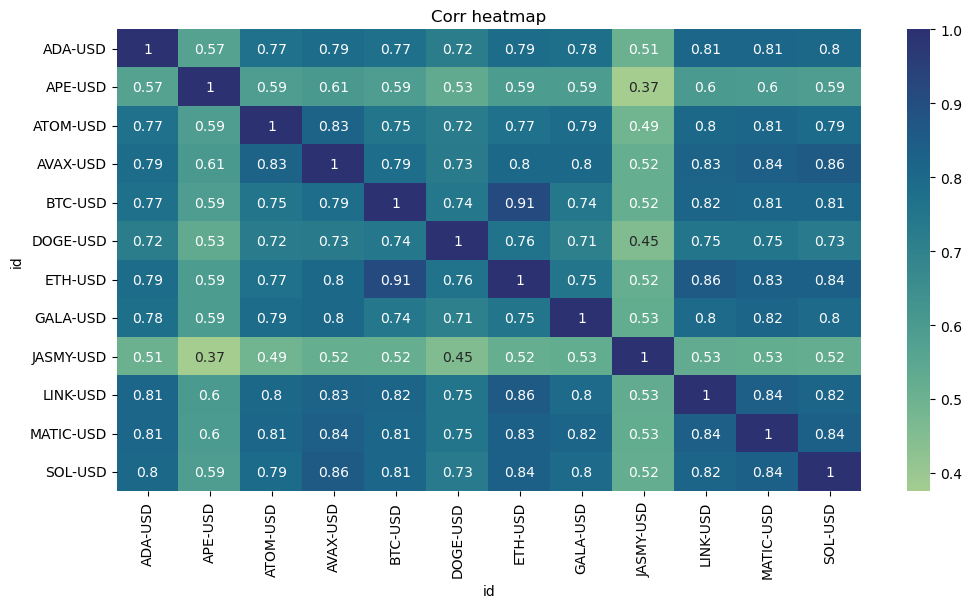

In [108]:

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.heatmap(df_ts_ret.corr(), annot=True, cmap="crest")

ax.set_title("Corr heatmap")

plt.savefig(fig_path / "EDA/heatmap.png")


In [112]:

df_all

,,low,high,open,close,volume
time,id,,,,,
2020-01-01 01:00:00,BTC-USD,7147.18000,7204.94000,7149.26000,7194.52000,2.322033e+02
2020-01-01 02:00:00,BTC-USD,7191.44000,7218.42000,7194.52000,7217.00000,1.899379e+02
2020-01-01 03:00:00,BTC-USD,7193.34000,7217.00000,7217.00000,7196.98000,2.347398e+02
2020-01-01 04:00:00,BTC-USD,7183.85000,7200.62000,7196.99000,7186.41000,2.059087e+02
2020-01-01 05:00:00,BTC-USD,7183.85000,7199.00000,7186.40000,7197.31000,1.205961e+02
...,...,...,...,...,...,...
2022-06-29 20:00:00,GALA-USD,0.05704,0.05831,0.05765,0.05734,1.201360e+07
2022-06-29 21:00:00,GALA-USD,0.05710,0.05787,0.05739,0.05711,8.590665e+06
2022-06-29 22:00:00,GALA-USD,0.05680,0.05764,0.05715,0.05729,3.228204e+06


In [127]:
df_etf = df_all.reset_index().query("id == 'BTC-USD'")
df_etf['ret_etf'] = df_etf['close'].pct_change()


df = df_all.reset_index().query("id != 'BTC-USD'")
df['ret'] = df.groupby("id")['close'].pct_change()


temp = df.merge(
    df_etf[['time', 'ret_etf']], how='left', left_on='time', right_on='time').dropna()

for ticker in tqdm(temp.id.unique()):
    temp1 = temp[temp.id == ticker]
    idx = temp1.index

    for i in range(121, temp1.shape[0]):
        x = sm.add_constant(temp1.iloc[i-120:i]['ret_etf'].values)
        # x = temp1.iloc[i-120:i]['ret_etf'].values
        y = temp1.iloc[i-120:i]['ret'].values
        # w = temp1.iloc[i-60:i]['vol'].values
        res = sm.WLS(y, x, weights=range(1, 121)).fit()
        ress = sm.tsa.AutoReg(res.resid.cumsum(), lags=1).fit()
        # a, b = ress.params

        temp.loc[idx[i], 'a'], temp.loc[idx[i], 'b'] = ress.params
        temp.loc[idx[i], 'xi'] = np.var(ress.resid)
        temp.loc[idx[i], 'alpha'], temp.loc[idx[i], 'beta'] = res.params
        temp.loc[idx[i], 'kappa'] = -np.log(ress.params[1])*252

df_xlf = temp.dropna()

df_xlf['signal'] = - (df_xlf['a']/(1-df_xlf['b']) + df_xlf['alpha']/df_xlf['kappa']) * \
    np.sqrt((1 - df_xlf['b']**2)/df_xlf['xi'])
df_xlf = df_xlf.reset_index()


  0%|          | 0/11 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [123]:

ind_name = "BTC"
data_path = Path("../../Data")
if not (data_path/ind_name).exists():
    (data_path/ind_name).mkdir()

for ticker in df_xlf.id.unique():
    df_xlf[df_xlf.id == ticker][['time', 'close', 'open', 'volume', 'signal', 'beta', 'kappa', 'xi', 'ret', 'ret_etf']].to_csv(
        data_path/ind_name/f'{ticker}.csv', index=False)

if not (data_path/"etf").exists():
    (data_path/"etf").mkdir()
df_etf.to_csv(data_path/"etf"/f'BTC.csv', index=False)


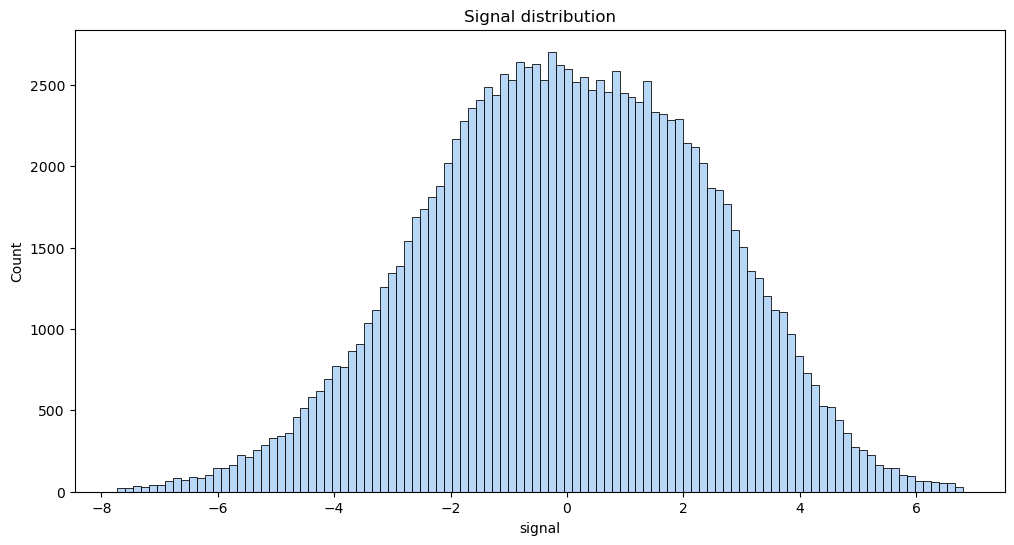

In [124]:

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.set_title("Signal distribution")

l = df_xlf['signal'].quantile(0.001)
u = df_xlf['signal'].quantile(0.999)
sns.histplot(df_xlf.query(f"signal < {u} and signal > {l}")['signal'])

plt.savefig(fig_path / "EDA/signal_hist.png")
# .clip(lower = df_xlf['signal'].quantile(0.01), upper = df_xlf['signal'].quantile(0.99))

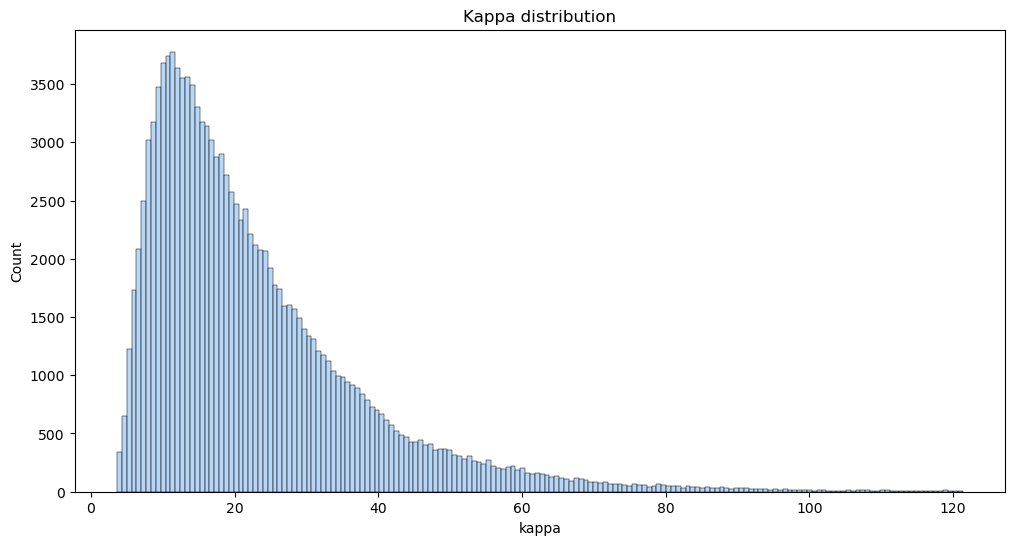

In [125]:

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.set_title("Kappa distribution")

l = max(df_xlf['kappa'].quantile(0.001), 0)
u = df_xlf['kappa'].quantile(0.999)
sns.histplot(df_xlf.query(f"kappa < {u} and kappa > {l}")['kappa'])

plt.savefig(fig_path / "EDA/kappa_hist.png")

In [126]:
df_xlf.query("kappa < 0").head(40)

,index,time,id,low,high,open,close,volume,ret,ret_etf,a,b,xi,alpha,beta,kappa,signal
